# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',185)
pd.set_option('display.max_rows',185)

In [2]:
df=pd.read_csv("PBL 5 recommendation data.csv",encoding="iso-8859-1")

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,16.06,NaN,16706988SV3261147,NaN,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20186,17421,1842.0,"Medline Emesis/Barf Bags, throw up bag

In [5]:
df.shape

(4194, 181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
df.corr()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
Customers.id,1.000000,0.951397,NaN,0.087253,NaN,-0.639947,1.000000,NaN,NaN,NaN,0.891923,0.363692,0.931931,1.000000,0.515002,0.571197,NaN,-0.032623,-0.040149,-0.004721,0.657639,0.105056,NaN,NaN,0.044152,0.057158,-0.037907,0.187999,NaN,NaN,-1.000000,-0.088350,0.885575,-0.046010,NaN,NaN,0.168347,0.885630,0.906843,0.886407,NaN,NaN,NaN,NaN,NaN,-0.102061,0.320346,0.931643,0.931931,0.399430,NaN,NaN,-0.002762,-0.040332,-0.047251,NaN,NaN,0.020407,NaN,0.044151,0.396045,0.071312,NaN,0.294253,0.315419,NaN,-0.054290,-0.058560,-0.148926,-0.058923,-0.051465,-0.071350,NaN,-0.193089,-0.214644,-0.231730,-0.003188,NaN,-0.140056,NaN,NaN,NaN,-0.015171,NaN,NaN,NaN,NaN,NaN,NaN,-0.250860,0.024404,-0.274770,0.016610,0.007382,NaN,0.129465,-0.012930,-0.075404,-0.018854,NaN,-0.158864,-0.144105,-0.151182,-0.098889,-0.282855,NaN,0.055784,NaN
Customers.create_date,0.951397,1.000000,NaN,0.094404,NaN,-0.612277,1.000000,NaN,NaN,NaN,0.883490,0.330749,0.891490,0.951397,0.460924,0.408765,NaN,-0.012880,-0.034733,-0.017057,0.671558,0.112978,NaN,NaN,0.053137,0.025668,-0.016653,0.185037,NaN,NaN,-1.000000,-0.043323,0.936341,-0.025055,NaN,NaN,0.123481,0.936910,0.839279,0.935092,NaN,NaN,NaN,NaN,NaN,-0.039971,0.294274,0.896279,0.891490,0.384278,NaN,NaN,-0.003536,-0.025728,-0.034001,NaN,NaN,-0.140615,NaN,0.063760,0.382064,0.060735,NaN,0.268168,0.280648,NaN,-0.044928,-0.047666,-0.154201,-0.046971,-0.047779,-0.077668,NaN,-0.187662,-0.198281,-0.218402,-0.003190,NaN,-0.141576,NaN,NaN,NaN,-0.018182,NaN,NaN,NaN,NaN,NaN,NaN,-0.232475,0.010814,-0.275290,0.002708,0.023598,NaN,0.138321,-0.028929,-0.081397,-0.000640,NaN,-0.141344,-0.139152,-0.148081,-0.112419,-0.267895,NaN,0.044648,NaN
Customers.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [9]:
df=df.dropna()        #We delete null columns.
 

In [10]:
df_total_data=pd.DataFrame(df.isnull().sum()) 
df_total_data 
less_data_table=df_total_data[df_total_data[0]>1000] 


In [11]:
for i in less_data_table.index:
    df.drop(i,axis=1,inplace=True)


In [12]:
pd.DataFrame(df.isnull().sum()).head(10)

,0
Customers.id,0.0
Customers.fname,0.0
Customers.lname,0.0
Customers.company,0.0
Customers.create_date,0.0
Customers.status,0.0
Customers.mailing,0.0
Customers.reminders,0.0
Customers.tax_exempt,0.0
Customers.account_id,0.0


In [15]:
import numpy as np

In [16]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost


In [19]:
df.isnull().sum()

Customers.id                      0.0
Customers.fname                   0.0
Customers.lname                   0.0
Customers.company                 0.0
Customers.create_date             0.0
Customers.status                  0.0
Customers.mailing                 0.0
Customers.reminders               0.0
Customers.tax_exempt              0.0
Customers.account_id              0.0
Customers.sales_rep               0.0
Customers.rewards                 0.0
Customers.profile_id              0.0
Customers.last_modified           0.0
Customers.customer_type           0.0
Orders.id                         0.0
Orders.customer_id                0.0
Orders.fname                      0.0
Orders.lname                      0.0
Orders.company                    0.0
Orders.order_number               0.0
Orders.reorder_id                 0.0
Orders.external_source            0.0
Orders.external_id                0.0
Orders.currency                   0.0
Orders.sales_rep                  0.0
Orders.subto

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 0.0+ bytes


## Ranking 

In [21]:
def top_item(column_name,ranking="total"): 
    grouped=df.groupby(column_name).agg({
        "Order_Items.qty":[np.size,np.sum,np.mean],
        "Order_Items.price":[np.mean]})
    grouped["Total_Amount"]=grouped["Order_Items.qty"]["sum"]*grouped["Order_Items.price"]["mean"]
    if ranking=="sum":
        return grouped.sort_values(("Order_Items.qty","sum"),ascending=False).head(5)
    else:
        return grouped.sort_values(("Total_Amount"),ascending=False).head(5)
    
    #In the function we created named top_item,the total number of the relevant ones and the total amount of exprenditures are sorted separately.

In [22]:
top_item("Order_Items.product_name","sum")   #The Trutemp is the most popular item in "500"s.

Empty DataFrame
Columns: [(Order_Items.qty, size), (Order_Items.qty, sum), (Order_Items.qty, mean), (Order_Items.price, mean), (Total_Amount, )]
Index: []

In [23]:
top_item("Order_Items.product_name")    #Maximum purchasing item is Disposable EG Blanket,Gray

Empty DataFrame
Columns: [(Order_Items.qty, size), (Order_Items.qty, sum), (Order_Items.qty, mean), (Order_Items.price, mean), (Total_Amount, )]
Index: []

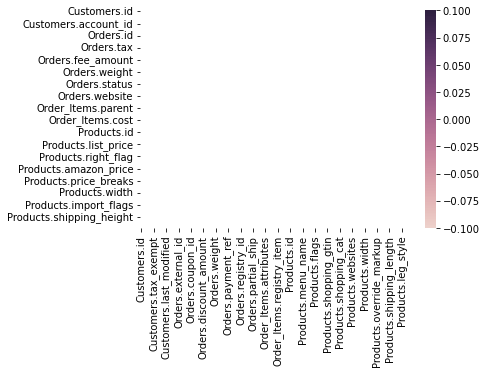

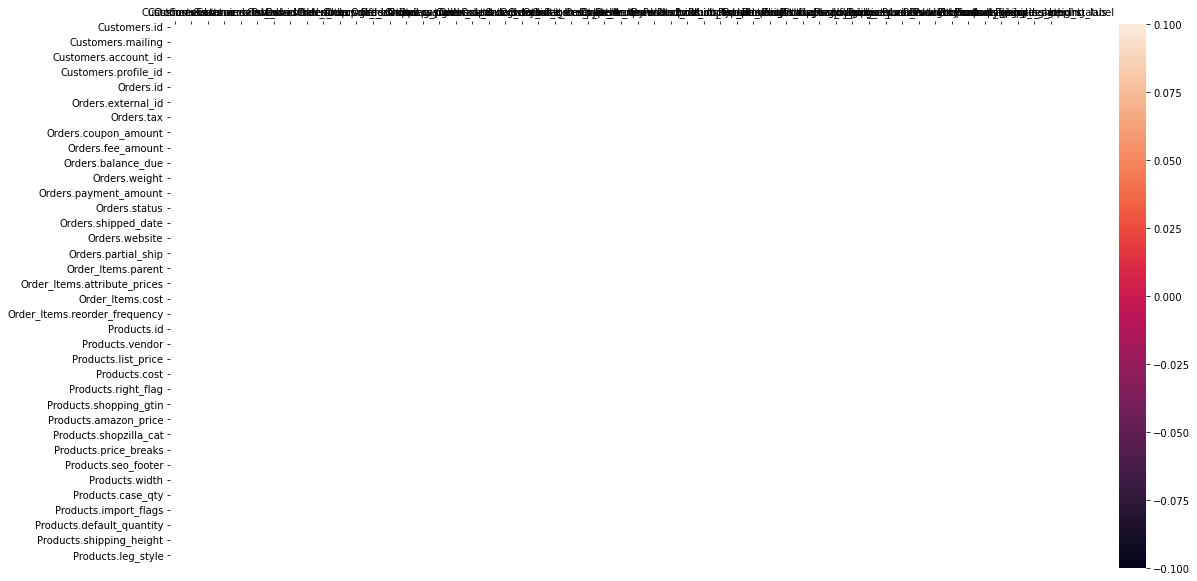

In [27]:
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(as_cmap=True))
f,ax=plt.subplots(1,1,figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()